In [87]:
%config Completer.use_jedi = False

In [88]:
import pandas as pd

In [89]:
t = pd.read_table('/home/abramov/Configs/master-dnase.txt')

In [90]:
required_cols = ["#EXP", "TREATMENT", "SPECIE", "CELLS", "ALIGNS", "GEO", "ENCODE"]
t = t.loc[:,required_cols]

In [91]:
t

,#EXP,TREATMENT,SPECIE,CELLS,ALIGNS,GEO,ENCODE
0,DEXP000000,NaN,Homo sapiens,trophoblast cell,DALIGNS000000,GSE90433,ENCSR964MZQ
1,DEXP000002,NaN,Homo sapiens,femur,DALIGNS000002,NaN,ENCSR805XIF
2,DEXP000003,"Source: fetal intestine, large; Donor: H-23887...",Homo sapiens,large intestine,DALIGNS000003,NaN,ENCSR874CAK
3,DEXP000004,"Source: fetal intestine, small; Donor: H-23887...",Homo sapiens,small intestine,DALIGNS000004,NaN,ENCSR502NDK
4,DEXP000005,Source: fetal renal pelvis; Donor: H-23833; Ag...,Homo sapiens,renal pelvis,DALIGNS000005,NaN,ENCSR956ZHU
...,...,...,...,...,...,...,...
1664,DEXP002746,Treatment: shRNA-scramble; Conditions: Open Ch...,Homo sapiens,RH4 (alveolar rhabdomyosarcoma),DALIGNS002746,GSE140115,NaN
1665,DEXP002747,Treatment: shRNA against CHD4; Conditions: Ope...,Homo sapiens,RH4 (alveolar rhabdomyosarcoma),DALIGNS002747,GSE140115,NaN
1666,DEXP002748,Treatment: none,Homo sapiens,SaOS2 (osteosarcoma),DALIGNS002748,GSE142160,NaN
1667,DEXP002749,Treatment: none,Homo sapiens,U2OS (osteosarcoma),DALIGNS002749,GSE142160,NaN


In [92]:
def no_treatment(x):
    if pd.isna(x):
        return True
    if not isinstance(x, str):
        raise Exception("Wrong value")
    x = x.lower()
    if "treatment" in x:
        return False
    if 'untreated' in x:
        return False 
    if  "genotype" in x:
        return False
    if "diabetic" in x:
        return False
    if "interferon" in x:
        return False
    if "egf" in x:
        return False
    if "deletion" in x:
        return False
    if "estradiol" in x:
        return False
    if "differentiation" in x:
        return False
    if "dexamethasone" in x:
        return False
    if "interleukin" in x:
        return False
    if 'grown with' in x:
        return False
    if "hydroxytamoxifen" in x:
        return False
    if "lentivirus" in x:
        return False
    return True

In [93]:
t = t[t['TREATMENT'].apply(no_treatment)].copy()

In [94]:
import numpy as np

In [95]:
t = t[t['SPECIE'] == "Homo sapiens"].copy()

In [96]:
align_cnt = t[['CELLS', 'ALIGNS']].groupby('CELLS').count()


In [97]:
selected_cells = align_cnt[align_cnt['ALIGNS'] >= 2].index

In [98]:
t = t[t['CELLS'].isin(selected_cells)].copy()

In [99]:
DNASE_PATH = "/mnt/NAS/home/abramov/dnase/"

In [100]:
import glob
import os
from collections import defaultdict

In [101]:
paths = glob.glob(os.path.join(DNASE_PATH, "*"))

In [102]:
def get_dalign_name(path):
    name = os.path.basename(path)
    dalign = name.split("_", 1)[0]
    return dalign

In [103]:
dalign_map = defaultdict(list)
for p in paths:
    d = get_dalign_name(p)
    dalign_map[d].append(p)

In [104]:
t['REPLICS_CNT'] = t['ALIGNS'].apply(lambda x: len(dalign_map[x]))

In [122]:
t = t[t['REPLICS_CNT']  == 2].copy()

In [123]:
d = t[['CELLS',  'ALIGNS'] ].groupby('CELLS').count()

In [124]:
d = d.reset_index()

In [127]:
d.sort_values(by="ALIGNS", ascending=False, inplace=True)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

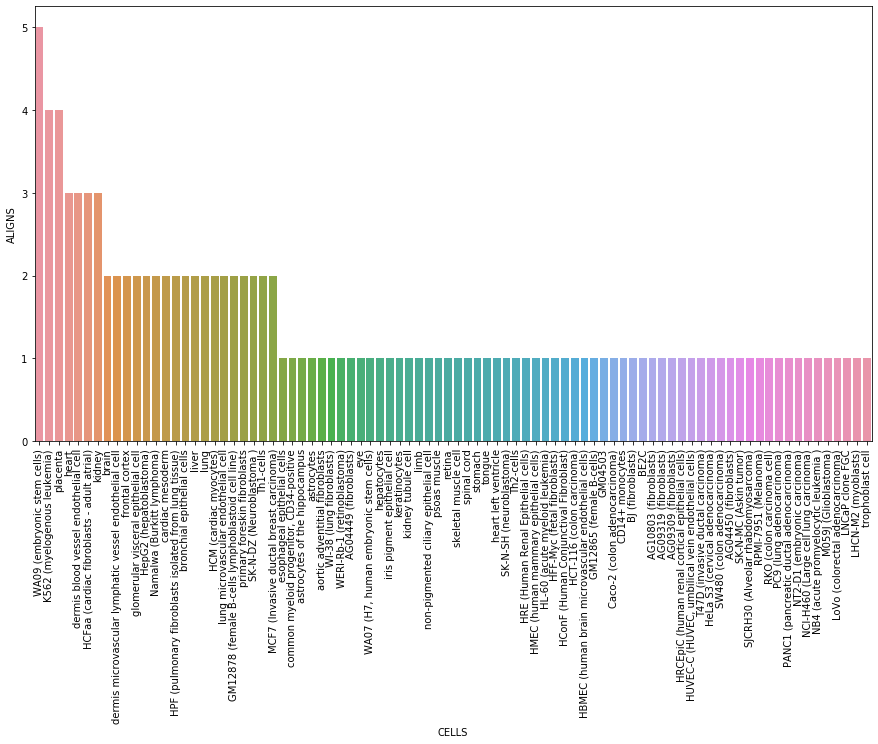

In [133]:
plt.figure(figsize=(15, 8))
sns.barplot(data=d, x='CELLS', y="ALIGNS")
plt.xticks(rotation=90)
plt.show()

In [134]:
chosen = ["WA09", "K562", "GM12878", "HepG2", "MCF7"]

In [137]:
gtrd_mapping = {"WA09": "WA09 (embryonic stem cells)",
          "K562": "K562 (myelogenous leukemia)",
          "GM12878": "GM12878 (female B-cells lymphoblastoid cell line)",
          "HepG2": "HepG2 (hepatoblastoma)",
          "MCF7": "MCF7 (Invasive ductal breast carcinoma)"}

In [138]:
chosen_cells = [gtrd_mapping[x] for x in chosen]

In [142]:
t = t[t['CELLS'].isin(chosen_cells)].copy()

In [148]:
t.drop(['REPLICS_CNT', 'SPECIE'], axis=1, inplace=True)

In [149]:
t.to_csv("chosen.tsv", sep="\t", index=None)

In [ ]:
DALIGNS000068
DALIGNS000572

In [150]:
!head chosen.tsv

#EXP	TREATMENT	CELLS	ALIGNS	GEO	ENCODE
DEXP000068		K562 (myelogenous leukemia)	DALIGNS000068		ENCSR921NMD
DEXP000128		WA09 (embryonic stem cells)	DALIGNS000128		ENCSR275ICP
DEXP000147		WA09 (embryonic stem cells)	DALIGNS000147	GSE90283	ENCSR017OZH
DEXP000322		GM12878 (female B-cells lymphoblastoid cell line)	DALIGNS000322		ENCSR000EMT
DEXP000352		HepG2 (hepatoblastoma)	DALIGNS000352		ENCSR000ENP
DEXP000520		K562 (myelogenous leukemia)	DALIGNS000520		ENCSR000EOT
DEXP000524		K562 (myelogenous leukemia)	DALIGNS000524		ENCSR000EOY
DEXP000563		WA09 (embryonic stem cells)	DALIGNS000563	GSE90429	ENCSR943SYS
DEXP000572		K562 (myelogenous leukemia)	DALIGNS000572		ENCSR000EPC
